In [141]:
import pandas as pd

df = pd.read_csv('cftr_variants.csv')
df.head()

,chromosome,position,id,ref,alt,qual,filter,info
0,7,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')",NaN,NaN,"{'ALLELEID': 1304016, 'CLNDISDB': ['MONDO:MOND..."
1,7,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')",NaN,NaN,"{'AF_TGP': 0.001, 'ALLELEID': 1138355, 'CLNDIS..."
2,7,117479129,['818101'],T,"Substitution(type_='SNV', value='G')",NaN,NaN,"{'AF_TGP': 0.22384, 'ALLELEID': 806292, 'CLNDI..."
3,7,117479156,['990530'],A,"Substitution(type_='SNV', value='G')",NaN,NaN,"{'ALLELEID': 978386, 'CLNDISDB': ['MONDO:MONDO..."
4,7,117479199,['557329'],CATT,"Substitution(type_='DEL', value='C')",NaN,NaN,"{'ALLELEID': 544428, 'CLNDISDB': ['MONDO:MONDO..."


In [142]:
df = df.drop(['qual', 'filter'], axis=1)


In [143]:
df.head()

,chromosome,position,id,ref,alt,info
0,7,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","{'ALLELEID': 1304016, 'CLNDISDB': ['MONDO:MOND..."
1,7,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","{'AF_TGP': 0.001, 'ALLELEID': 1138355, 'CLNDIS..."
2,7,117479129,['818101'],T,"Substitution(type_='SNV', value='G')","{'AF_TGP': 0.22384, 'ALLELEID': 806292, 'CLNDI..."
3,7,117479156,['990530'],A,"Substitution(type_='SNV', value='G')","{'ALLELEID': 978386, 'CLNDISDB': ['MONDO:MONDO..."
4,7,117479199,['557329'],CATT,"Substitution(type_='DEL', value='C')","{'ALLELEID': 544428, 'CLNDISDB': ['MONDO:MONDO..."


In [144]:
any_missing = df.isnull().values.any()

print("Are there any missing values? ", any_missing)

Are there any missing values?  True


In [145]:
missing_values = df.isnull().sum()

# Display the count of missing values per column
print(missing_values)

chromosome    0
position      0
id            0
ref           0
alt           6
info          0
dtype: int64


In [146]:
df = df.dropna(subset=['alt'])

In [147]:
any_missing = df.isnull().values.any()

print("Are there any missing values? ", any_missing)

Are there any missing values?  False


In [148]:
df.head()

,chromosome,position,id,ref,alt,info
0,7,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","{'ALLELEID': 1304016, 'CLNDISDB': ['MONDO:MOND..."
1,7,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","{'AF_TGP': 0.001, 'ALLELEID': 1138355, 'CLNDIS..."
2,7,117479129,['818101'],T,"Substitution(type_='SNV', value='G')","{'AF_TGP': 0.22384, 'ALLELEID': 806292, 'CLNDI..."
3,7,117479156,['990530'],A,"Substitution(type_='SNV', value='G')","{'ALLELEID': 978386, 'CLNDISDB': ['MONDO:MONDO..."
4,7,117479199,['557329'],CATT,"Substitution(type_='DEL', value='C')","{'ALLELEID': 544428, 'CLNDISDB': ['MONDO:MONDO..."


## handle info column

In [149]:
df['info'].head()

0    {'ALLELEID': 1304016, 'CLNDISDB': ['MONDO:MOND...
1    {'AF_TGP': 0.001, 'ALLELEID': 1138355, 'CLNDIS...
2    {'AF_TGP': 0.22384, 'ALLELEID': 806292, 'CLNDI...
3    {'ALLELEID': 978386, 'CLNDISDB': ['MONDO:MONDO...
4    {'ALLELEID': 544428, 'CLNDISDB': ['MONDO:MONDO...
Name: info, dtype: object

In [150]:
import ast

def parse_info(data):
    try:
        # Convert the string to dictionary if it's not already one (uncomment the next line if needed)
        data = ast.literal_eval(data) if isinstance(data, str) else data
        return pd.Series(data)
    except ValueError:
        return pd.Series({})

# Load your data
df = pd.read_csv('cftr_variants.csv', converters={'info': ast.literal_eval})  # Ensure 'info' is read as a dictionary


In [151]:
# Apply the function and join the resulting DataFrame with the original DataFrame
info_df = df['info'].apply(parse_info)
df = df.join(info_df)

# Check the new DataFrame structure
df.head()


,chromosome,position,id,ref,alt,qual,filter,info,ALLELEID,CLNDISDB,...,MC,AF_ESP,CLNDISDBINCL,CLNDNINCL,CLNSIGINCL,ONC,ONCREVSTAT,SCI,SCIREVSTAT,DBVARID
0,7,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')",NaN,NaN,"{'ALLELEID': 1304016, 'CLNDISDB': ['MONDO:MOND...",1304016,"[MONDO:MONDO:0009061, MedGen:C0010674, OMIM:21...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')",NaN,NaN,"{'AF_TGP': 0.001, 'ALLELEID': 1138355, 'CLNDIS...",1138355,"[MedGen:C3661900|MONDO:MONDO:0008185, MedGen:C...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,117479129,['818101'],T,"Substitution(type_='SNV', value='G')",NaN,NaN,"{'AF_TGP': 0.22384, 'ALLELEID': 806292, 'CLNDI...",806292,"[MONDO:MONDO:0009061, MedGen:C0010674, OMIM:21...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,117479156,['990530'],A,"Substitution(type_='SNV', value='G')",NaN,NaN,"{'ALLELEID': 978386, 'CLNDISDB': ['MONDO:MONDO...",978386,"[MONDO:MONDO:0009061, MedGen:C0010674, OMIM:21...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,117479199,['557329'],CATT,"Substitution(type_='DEL', value='C')",NaN,NaN,"{'ALLELEID': 544428, 'CLNDISDB': ['MONDO:MONDO...",544428,"[MONDO:MONDO:0009061, MedGen:C0010674, OMIM:21...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df.drop(['CLNDISDB', 'GENEINFO', 'RS', 'CLNDISDBINCL', 'qual', 'filter', 'CLNHGVS', 'CLNDN', 'ALLELEID', 'info'], axis=1, inplace=True)

In [153]:
# Find index for 'AF_TGP'
start_index = df.columns.get_loc("AF_TGP")

# Drop columns from 'AF_TGP' to the end
df.drop(df.columns[start_index:], axis=1, inplace=True)

In [154]:
df.head()

,chromosome,position,id,ref,alt,CLNREVSTAT,CLNSIG,CLNSIGCONF,CLNVC,CLNVCSO,ORIGIN
0,7,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","[criteria_provided, _conflicting_classifications]",[Conflicting_classifications_of_pathogenicity],[Pathogenic(1)|Uncertain_significance(1)],single_nucleotide_variant,SO:0001483,[1]
1,7,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","[criteria_provided, _conflicting_classifications]",[Conflicting_classifications_of_pathogenicity],[Uncertain_significance(1)|Likely_benign(2)],Duplication,SO:1000035,[1]
2,7,117479129,['818101'],T,"Substitution(type_='SNV', value='G')","[criteria_provided, _single_submitter]",[Benign],NaN,single_nucleotide_variant,SO:0001483,[1]
3,7,117479156,['990530'],A,"Substitution(type_='SNV', value='G')",[no_assertion_criteria_provided],[Uncertain_significance],NaN,single_nucleotide_variant,SO:0001483,[1]
4,7,117479199,['557329'],CATT,"Substitution(type_='DEL', value='C')","[criteria_provided, _single_submitter]",[Uncertain_significance],NaN,Deletion,SO:0000159,[0]


In [155]:
df.shape

(4895, 11)

In [156]:
import pandas as pd
import numpy as np

# Example DataFrame
# Assuming your DataFrame is already loaded as 'df'

# List of terms to filter for in the 'CLNSIG' column
terms = [
    'Uncertain_significance', 
    'not_provided', 
    'no_classification_for_the_single_variant', 
    'Conflicting_classifications_of_pathogenicity', 
    'drug_response'
]

# Condition to identify the rows that meet your criteria
condition = df['CLNSIG'].apply(lambda x: any(term in x for term in terms) if isinstance(x, list) else False) & df['CLNSIGCONF'].notna()

# Update the CLNSIG column with the value from CLNSIGCONF for the filtered rows
df.loc[condition, 'CLNSIG'] = df.loc[condition, 'CLNSIGCONF']

# Display the updated DataFrame
df



,chromosome,position,id,ref,alt,CLNREVSTAT,CLNSIG,CLNSIGCONF,CLNVC,CLNVCSO,ORIGIN
0,7,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","[criteria_provided, _conflicting_classifications]",[Pathogenic(1)|Uncertain_significance(1)],[Pathogenic(1)|Uncertain_significance(1)],single_nucleotide_variant,SO:0001483,[1]
1,7,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","[criteria_provided, _conflicting_classifications]",[Uncertain_significance(1)|Likely_benign(2)],[Uncertain_significance(1)|Likely_benign(2)],Duplication,SO:1000035,[1]
2,7,117479129,['818101'],T,"Substitution(type_='SNV', value='G')","[criteria_provided, _single_submitter]",[Benign],NaN,single_nucleotide_variant,SO:0001483,[1]
3,7,117479156,['990530'],A,"Substitution(type_='SNV', value='G')",[no_assertion_criteria_provided],[Uncertain_significance],NaN,single_nucleotide_variant,SO:0001483,[1]
4,7,117479199,['557329'],CATT,"Substitution(type_='DEL', value='C')","[criteria_provided, _single_submitter]",[Uncertain_significance],NaN,Deletion,SO:0000159,[0]
...,...,...,...,...,...,...,...,...,...,...,...
4890,7,117668402,['358749'],G,"Substitution(type_='SNV', value='A')","[criteria_provided, _single_submitter]",[Uncertain_significance],NaN,single_nucleotide_variant,SO:0001483,[1]
4891,7,117668600,['908460'],A,"Substitution(type_='SNV', value='G')","[criteria_provided, _single_submitter]",[Uncertain_significance],NaN,single_nucleotide_variant,SO:0001483,[1]
4892,7,117668653,['358750'],C,"Substitution(type_='SNV', value='T')","[criteria_provided, _single_submitter]",[Uncertain_significance],NaN,single_nucleotide_variant,SO:0001483,[1]
4893,7,117675861,['522676'],C,"Substitution(type_='SNV', value='T')","[criteria_provided, _single_submitter]",[Pathogenic],NaN,single_nucleotide_variant,SO:0001483,[4]


# processing the CLNSIG Column 

In [157]:
# Flatten the lists and find unique elements
unique_elements = set([item for sublist in df['CLNSIG'] for item in sublist])

print(unique_elements)


{'Pathogenic(2)|Likely_pathogenic(17)|Uncertain_significance(4)', 'Uncertain_significance(1)|Benign(1)|Likely_benign(3)', 'Pathogenic(4)|Likely_pathogenic(3)|Uncertain_significance(4)', 'Pathogenic(1)|Uncertain_significance(2)', 'Uncertain_significance(3)|Likely_benign(3)', 'Likely_pathogenic', 'Uncertain_significance(1)|Benign(11)|Likely_benign(2)', 'Pathogenic(1)|Uncertain_significance(7)', 'Uncertain_significance(4)|Benign(2)|Likely_benign(3)', 'Pathogenic(1)|Likely_pathogenic(1)|Uncertain_significance(3)', 'Likely_pathogenic(4)|Uncertain_significance(2)', 'Likely_pathogenic(2)|Uncertain_significance(7)', 'Likely_pathogenic(5)|Uncertain_significance(1)', 'Uncertain_significance(11)|Benign(2)', 'Pathogenic(2)|Likely_pathogenic(2)|Uncertain_significance(4)', 'Likely_pathogenic(1)|Uncertain_significance(8)', 'Pathogenic(1)|Likely_pathogenic(4)|Uncertain_significance(3)', 'Uncertain_significance(4)|Benign(5)|Likely_benign(4)', 'Pathogenic(2)|Likely_pathogenic(1)|Uncertain_significance(9

In [158]:
df['CLNSIG'] = df['CLNSIG'].astype(str)


In [159]:
import pandas as pd

# Assuming df is your DataFrame
# Remove brackets, single quotes, numbers, and parentheses
df['CLNSIG'] = df['CLNSIG'].str.replace("[\[\]'\d()]", "", regex=True)

# Display the updated DataFrame



In [160]:
df.head()

,chromosome,position,id,ref,alt,CLNREVSTAT,CLNSIG,CLNSIGCONF,CLNVC,CLNVCSO,ORIGIN
0,7,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","[criteria_provided, _conflicting_classifications]",Pathogenic|Uncertain_significance,[Pathogenic(1)|Uncertain_significance(1)],single_nucleotide_variant,SO:0001483,[1]
1,7,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","[criteria_provided, _conflicting_classifications]",Uncertain_significance|Likely_benign,[Uncertain_significance(1)|Likely_benign(2)],Duplication,SO:1000035,[1]
2,7,117479129,['818101'],T,"Substitution(type_='SNV', value='G')","[criteria_provided, _single_submitter]",Benign,NaN,single_nucleotide_variant,SO:0001483,[1]
3,7,117479156,['990530'],A,"Substitution(type_='SNV', value='G')",[no_assertion_criteria_provided],Uncertain_significance,NaN,single_nucleotide_variant,SO:0001483,[1]
4,7,117479199,['557329'],CATT,"Substitution(type_='DEL', value='C')","[criteria_provided, _single_submitter]",Uncertain_significance,NaN,Deletion,SO:0000159,[0]


In [161]:
df['CLNSIG'] = df['CLNSIG'].str.split('/|\|')  # Regex pattern to split on either '/' or '|'
df = df.explode('CLNSIG')

# Trim any leading or trailing whitespace that might be introduced during the split
df['CLNSIG'] = df['CLNSIG'].str.strip()



In [162]:
# Check unique values to ensure proper splitting
print(df['CLNSIG'].unique())


['Pathogenic' 'Uncertain_significance' 'Likely_benign' 'Benign'
 'Likely_pathogenic' 'not_provided'
 'no_classification_for_the_single_variant' 'drug_response' 'other']


In [163]:
df = df.rename(columns={'CLNSIG': 'clinical_significance'})


In [164]:
df.head()

,chromosome,position,id,ref,alt,CLNREVSTAT,clinical_significance,CLNSIGCONF,CLNVC,CLNVCSO,ORIGIN
0,7,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","[criteria_provided, _conflicting_classifications]",Pathogenic,[Pathogenic(1)|Uncertain_significance(1)],single_nucleotide_variant,SO:0001483,[1]
0,7,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","[criteria_provided, _conflicting_classifications]",Uncertain_significance,[Pathogenic(1)|Uncertain_significance(1)],single_nucleotide_variant,SO:0001483,[1]
1,7,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","[criteria_provided, _conflicting_classifications]",Uncertain_significance,[Uncertain_significance(1)|Likely_benign(2)],Duplication,SO:1000035,[1]
1,7,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","[criteria_provided, _conflicting_classifications]",Likely_benign,[Uncertain_significance(1)|Likely_benign(2)],Duplication,SO:1000035,[1]
2,7,117479129,['818101'],T,"Substitution(type_='SNV', value='G')","[criteria_provided, _single_submitter]",Benign,NaN,single_nucleotide_variant,SO:0001483,[1]


In [165]:
exclude_values = ['not_provided', 'no_classification_for_the_single_variant', 'other', 'Uncertain_significance', 'drug_response']

# Filter the DataFrame to exclude rows where 'impact' matches any of the values in 'exclude_values'
df = df[~df['clinical_significance'].isin(exclude_values)]

In [166]:
df.shape

(3290, 11)

In [167]:
df.drop(['CLNSIGCONF'], axis=1, inplace=True)

In [168]:
df.head()

,chromosome,position,id,ref,alt,CLNREVSTAT,clinical_significance,CLNVC,CLNVCSO,ORIGIN
0,7,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","[criteria_provided, _conflicting_classifications]",Pathogenic,single_nucleotide_variant,SO:0001483,[1]
1,7,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","[criteria_provided, _conflicting_classifications]",Likely_benign,Duplication,SO:1000035,[1]
2,7,117479129,['818101'],T,"Substitution(type_='SNV', value='G')","[criteria_provided, _single_submitter]",Benign,single_nucleotide_variant,SO:0001483,[1]
5,7,117479204,['1535894'],TCTC,"Substitution(type_='DEL', value='T')","[criteria_provided, _single_submitter]",Likely_benign,Microsatellite,SO:0000289,[1]
6,7,117479208,['51027'],C,"Substitution(type_='SNV', value='T')","[criteria_provided, _multiple_submitters, _no_...",Benign,single_nucleotide_variant,SO:0001483,[1]


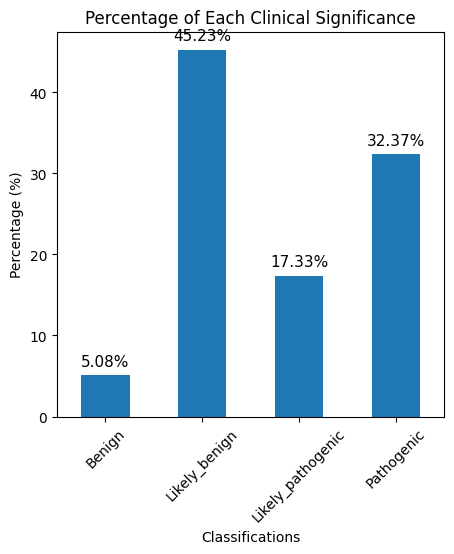

In [169]:
import matplotlib.pyplot as plt

clinical_significance_dummies = pd.get_dummies(df['clinical_significance'])

# Add these dummies back to the main DataFrame if you need them for other analyses (optional)
df = pd.concat([df, clinical_significance_dummies], axis=1)

# Sum the occurrences of each dummy variable (each classification) and calculate percentages
classification_counts = clinical_significance_dummies.sum()
total = classification_counts.sum()
classification_percentages = (classification_counts / total) * 100

# Plot the classification frequencies
ax = classification_percentages.plot(kind='bar', figsize=(5, 5))
plt.title('Percentage of Each Clinical Significance')
plt.ylabel('Percentage (%)')
plt.xlabel('Classifications')
plt.xticks(rotation=45)  # Rotate labels to make them more readable

# Annotate the bars with the percentage values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

plt.show()


In [170]:
# Define the ordinal mapping
ordinal_mapping = {
    'Benign': 1,
    'Likely_benign': 2,
    'Likely_pathogenic': 3,
    'Pathogenic': 4,
}

# Apply the mapping to create a new column
df['clinical_significance_ordinal'] = df['clinical_significance'].map(ordinal_mapping)

# Drop the original 'clinical_significance' column if no longer needed
df.drop(['clinical_significance'], axis=1, inplace=True)

# Manually remove the columns named 'Benign', 'Likely_benign', 'Likely_pathogenic', 'Pathogenic'
columns_to_remove = ['Benign', 'Likely_benign', 'Likely_pathogenic', 'Pathogenic', 'chromosome']
df.drop(columns_to_remove, axis=1, inplace=True)







In [171]:
df.head()

,position,id,ref,alt,CLNREVSTAT,CLNVC,CLNVCSO,ORIGIN,clinical_significance_ordinal
0,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","[criteria_provided, _conflicting_classifications]",single_nucleotide_variant,SO:0001483,[1],4
1,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","[criteria_provided, _conflicting_classifications]",Duplication,SO:1000035,[1],2
2,117479129,['818101'],T,"Substitution(type_='SNV', value='G')","[criteria_provided, _single_submitter]",single_nucleotide_variant,SO:0001483,[1],1
5,117479204,['1535894'],TCTC,"Substitution(type_='DEL', value='T')","[criteria_provided, _single_submitter]",Microsatellite,SO:0000289,[1],2
6,117479208,['51027'],C,"Substitution(type_='SNV', value='T')","[criteria_provided, _multiple_submitters, _no_...",single_nucleotide_variant,SO:0001483,[1],1


# ref column 

In [172]:
# unique_values = df['ref'].unique()
# unique_values

In [173]:
df = df[df['ref'].str.len() <= 14]


In [174]:

df.head()

,position,id,ref,alt,CLNREVSTAT,CLNVC,CLNVCSO,ORIGIN,clinical_significance_ordinal
0,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","[criteria_provided, _conflicting_classifications]",single_nucleotide_variant,SO:0001483,[1],4
1,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","[criteria_provided, _conflicting_classifications]",Duplication,SO:1000035,[1],2
2,117479129,['818101'],T,"Substitution(type_='SNV', value='G')","[criteria_provided, _single_submitter]",single_nucleotide_variant,SO:0001483,[1],1
5,117479204,['1535894'],TCTC,"Substitution(type_='DEL', value='T')","[criteria_provided, _single_submitter]",Microsatellite,SO:0000289,[1],2
6,117479208,['51027'],C,"Substitution(type_='SNV', value='T')","[criteria_provided, _multiple_submitters, _no_...",single_nucleotide_variant,SO:0001483,[1],1


In [175]:
import sys

# Increase the maximum limit for integer string conversion
sys.set_int_max_str_digits(10000)  # Set this to a higher value if necessary

# Continue with your encoding as before


# Define the mapping
nucleotide_mapping = {'A': 0, 'T': 1, 'C': 2, 'G': 3}

# Function to map sequences to a single integer
def encode_sequence_to_integer(seq):
    # Replace each nucleotide with its corresponding digit and join them
    encoded_string = ''.join(str(nucleotide_mapping[nucleotide]) for nucleotide in seq)
    # Convert the resulting string to an integer
    return int(encoded_string)

# Apply the mapping to the DataFrame
df['ref_encoded'] = df['ref'].apply(encode_sequence_to_integer)

# Display the DataFrame
df.head()

,position,id,ref,alt,CLNREVSTAT,CLNVC,CLNVCSO,ORIGIN,clinical_significance_ordinal,ref_encoded
0,117478787,['1313755'],A,"Substitution(type_='SNV', value='G')","[criteria_provided, _conflicting_classifications]",single_nucleotide_variant,SO:0001483,[1],4,0
1,117479051,['1144671'],C,"Substitution(type_='INS', value='CT')","[criteria_provided, _conflicting_classifications]",Duplication,SO:1000035,[1],2,2
2,117479129,['818101'],T,"Substitution(type_='SNV', value='G')","[criteria_provided, _single_submitter]",single_nucleotide_variant,SO:0001483,[1],1,1
5,117479204,['1535894'],TCTC,"Substitution(type_='DEL', value='T')","[criteria_provided, _single_submitter]",Microsatellite,SO:0000289,[1],2,1212
6,117479208,['51027'],C,"Substitution(type_='SNV', value='T')","[criteria_provided, _multiple_submitters, _no_...",single_nucleotide_variant,SO:0001483,[1],1,2


In [176]:
df.drop(['ref'], axis=1, inplace=True)

# Alt column 

In [177]:
# List of variant types to search for
variants = ['SNV', 'INS', 'DEL', 'INDEL', 'MNV']

# Function to determine the variant type
def find_variant_type(alt_value):
    if isinstance(alt_value, str):  # Check if the entry is a string
        for variant in variants:
            if variant in alt_value:
                return variant
    return None  # Return None if no variant is found

# Add the 'variant_type' column by applying the function
df['variant_type'] = df['alt'].apply(find_variant_type)

# Display the updated DataFrame
df.head()

,position,id,alt,CLNREVSTAT,CLNVC,CLNVCSO,ORIGIN,clinical_significance_ordinal,ref_encoded,variant_type
0,117478787,['1313755'],"Substitution(type_='SNV', value='G')","[criteria_provided, _conflicting_classifications]",single_nucleotide_variant,SO:0001483,[1],4,0,SNV
1,117479051,['1144671'],"Substitution(type_='INS', value='CT')","[criteria_provided, _conflicting_classifications]",Duplication,SO:1000035,[1],2,2,INS
2,117479129,['818101'],"Substitution(type_='SNV', value='G')","[criteria_provided, _single_submitter]",single_nucleotide_variant,SO:0001483,[1],1,1,SNV
5,117479204,['1535894'],"Substitution(type_='DEL', value='T')","[criteria_provided, _single_submitter]",Microsatellite,SO:0000289,[1],2,1212,DEL
6,117479208,['51027'],"Substitution(type_='SNV', value='T')","[criteria_provided, _multiple_submitters, _no_...",single_nucleotide_variant,SO:0001483,[1],1,2,SNV


In [178]:
# Step 1: Remove unwanted symbols like brackets, parentheses, and quotes
df['alt'] = df['alt'].str.replace(r'[\[\]\(\)\'\"]', '', regex=True)

# Step 2: Strip any leading or trailing whitespace (just in case)
df['alt'] = df['alt'].str.strip()

In [179]:
df.head()

,position,id,alt,CLNREVSTAT,CLNVC,CLNVCSO,ORIGIN,clinical_significance_ordinal,ref_encoded,variant_type
0,117478787,['1313755'],"Substitutiontype_=SNV, value=G","[criteria_provided, _conflicting_classifications]",single_nucleotide_variant,SO:0001483,[1],4,0,SNV
1,117479051,['1144671'],"Substitutiontype_=INS, value=CT","[criteria_provided, _conflicting_classifications]",Duplication,SO:1000035,[1],2,2,INS
2,117479129,['818101'],"Substitutiontype_=SNV, value=G","[criteria_provided, _single_submitter]",single_nucleotide_variant,SO:0001483,[1],1,1,SNV
5,117479204,['1535894'],"Substitutiontype_=DEL, value=T","[criteria_provided, _single_submitter]",Microsatellite,SO:0000289,[1],2,1212,DEL
6,117479208,['51027'],"Substitutiontype_=SNV, value=T","[criteria_provided, _multiple_submitters, _no_...",single_nucleotide_variant,SO:0001483,[1],1,2,SNV


In [180]:
 
df['alteration'] = df['alt'].str.extract(r'value\s*=\s*(.*)')


In [181]:
df = df.drop(columns=['alt'])

In [182]:
df= df[df['alteration'].str.len() <= 14]


In [183]:
type=df['alteration'].unique()
type


array(['G', 'CT', 'T', 'A', 'C', 'AG', 'CTT', 'CA', 'GA', 'AAAAATTGG',
       'GT', 'AT', 'AATG', 'ATGA', 'TA', 'TC', 'CTTA', 'GAC', 'CCTA',
       'TCC', 'CAA', 'GACAT', 'TG', 'GTACA', 'AGATT', 'TACG',
       'GCTGGGAAGAT', 'ACT', 'AATATTCACCACC', 'ATC', 'AAAAA', 'GTATGA',
       'AAT', 'ATG', 'ATGTG', 'ATGTGTGTG', 'GTGTGT', 'TTT', 'GTGT', 'GTT',
       'TT', 'TTG', 'GTGTGTT', 'GTGTT', 'GTTTT', 'TGTG', 'TTGTG', 'GTG',
       'GTGTG', 'AAGAT', 'TATG', 'CTACCCAAATTA', 'ATT', 'TTA', 'AGAAA',
       'GAGAT', 'AC', 'CTTTT', 'TTTTTGTTTG', 'GC', 'GAT', 'TAACG', 'CTG',
       'GGA', 'TCAGA', 'GTCTAAGAA', 'TTC', 'ACTATG', 'N', 'AAATT',
       'ATTATC', 'GTA', 'GAGTA', 'GTCAA', 'GGATCA', 'GAA', 'AATATG',
       'AAGGG', 'AGGTTG', 'TCCTA', 'AA', 'TGCTTGA', 'CGA'], dtype=object)

In [184]:
import sys

# Increase the maximum limit for integer string conversion
sys.set_int_max_str_digits(10000)  # Set this to a higher value if necessary

# Continue with your encoding as before

df= df[df['alteration'] != 'N']

# Define the mapping
nucleotide_mapping = {'A': 0, 'T': 1, 'C': 2, 'G': 3}

# Function to map sequences to a single integer
def encode_sequence_to_integer(seq):
    # Replace each nucleotide with its corresponding digit and join them
    encoded_string = ''.join(str(nucleotide_mapping[nucleotide]) for nucleotide in seq)
    # Convert the resulting string to an integer
    return int(encoded_string)

# Apply the mapping to the DataFrame
df['alteration'] = df['alteration'].apply(encode_sequence_to_integer)

# Display the DataFrame
df.head()

,position,id,CLNREVSTAT,CLNVC,CLNVCSO,ORIGIN,clinical_significance_ordinal,ref_encoded,variant_type,alteration
0,117478787,['1313755'],"[criteria_provided, _conflicting_classifications]",single_nucleotide_variant,SO:0001483,[1],4,0,SNV,3
1,117479051,['1144671'],"[criteria_provided, _conflicting_classifications]",Duplication,SO:1000035,[1],2,2,INS,21
2,117479129,['818101'],"[criteria_provided, _single_submitter]",single_nucleotide_variant,SO:0001483,[1],1,1,SNV,3
5,117479204,['1535894'],"[criteria_provided, _single_submitter]",Microsatellite,SO:0000289,[1],2,1212,DEL,1
6,117479208,['51027'],"[criteria_provided, _multiple_submitters, _no_...",single_nucleotide_variant,SO:0001483,[1],1,2,SNV,1


# CLNREVSTAT column

In [185]:
# Assuming df['CLNREVSTAT'] contains lists as its values
unique_elements = df['CLNREVSTAT'].apply(tuple).unique()

# Convert the tuples back to lists if needed
unique_elements = [list(x) for x in unique_elements]

print(unique_elements)


[['criteria_provided', '_conflicting_classifications'], ['criteria_provided', '_single_submitter'], ['criteria_provided', '_multiple_submitters', '_no_conflicts'], ['reviewed_by_expert_panel'], ['no_assertion_criteria_provided'], ['practice_guideline']]


In [186]:
list_mapping = {
    ('criteria_provided', '_conflicting_classifications'): 1,
    ('criteria_provided', '_single_submitter'): 2,
    ('criteria_provided', '_multiple_submitters', '_no_conflicts'): 3,
    ('no_assertion_criteria_provided',): 0,
    ('reviewed_by_expert_panel',): 4,
    ('practice_guideline',): 5
}

# Convert each list to a tuple and map to numbers
df['CLNREVSTAT_encoded'] = df['CLNREVSTAT'].apply(lambda x: list_mapping.get(tuple(x), 0))


In [187]:
df.head()

,position,id,CLNREVSTAT,CLNVC,CLNVCSO,ORIGIN,clinical_significance_ordinal,ref_encoded,variant_type,alteration,CLNREVSTAT_encoded
0,117478787,['1313755'],"[criteria_provided, _conflicting_classifications]",single_nucleotide_variant,SO:0001483,[1],4,0,SNV,3,1
1,117479051,['1144671'],"[criteria_provided, _conflicting_classifications]",Duplication,SO:1000035,[1],2,2,INS,21,1
2,117479129,['818101'],"[criteria_provided, _single_submitter]",single_nucleotide_variant,SO:0001483,[1],1,1,SNV,3,2
5,117479204,['1535894'],"[criteria_provided, _single_submitter]",Microsatellite,SO:0000289,[1],2,1212,DEL,1,2
6,117479208,['51027'],"[criteria_provided, _multiple_submitters, _no_...",single_nucleotide_variant,SO:0001483,[1],1,2,SNV,1,3


In [188]:
df = df.drop(columns=['CLNREVSTAT'])

In [189]:
df = df.drop(columns=['CLNVC'])

In [190]:
df = df.drop(columns=['CLNVCSO'])

# ORIGIN column

In [191]:
# Assuming df['CLNREVSTAT'] contains lists as its values
unique_elements = df['ORIGIN'].apply(tuple).unique()

# Convert the tuples back to lists if needed
unique_elements = [list(x) for x in unique_elements]

print(unique_elements)

[['1'], ['5'], ['0'], ['33'], ['25'], ['17'], ['9'], ['4'], ['16'], ['29'], ['13'], ['21'], ['8'], ['65']]


In [192]:

# Convert list entries to string
df['ORIGIN'] = df['ORIGIN'].apply(lambda x: ','.join(x))

# Count the occurrences of each unique list
value_counts = df['ORIGIN'].value_counts()

# Display the counts
print(value_counts)

ORIGIN
1     2948
0      214
5       22
17      10
65       5
9        4
25       3
33       2
4        2
16       1
29       1
13       1
21       1
8        1
Name: count, dtype: int64


In [193]:
# Drop the column 'ORIGIN' from the DataFrame
df = df.drop(columns=['ORIGIN'])


In [194]:
df.head()

,position,id,clinical_significance_ordinal,ref_encoded,variant_type,alteration,CLNREVSTAT_encoded
0,117478787,['1313755'],4,0,SNV,3,1
1,117479051,['1144671'],2,2,INS,21,1
2,117479129,['818101'],1,1,SNV,3,2
5,117479204,['1535894'],2,1212,DEL,1,2
6,117479208,['51027'],1,2,SNV,1,3


In [195]:
df = df.drop(columns=['id'])


In [196]:
df.head()

,position,clinical_significance_ordinal,ref_encoded,variant_type,alteration,CLNREVSTAT_encoded
0,117478787,4,0,SNV,3,1
1,117479051,2,2,INS,21,1
2,117479129,1,1,SNV,3,2
5,117479204,2,1212,DEL,1,2
6,117479208,1,2,SNV,1,3


# variant_type column

In [197]:
# Assuming df['CLNREVSTAT'] contains lists as its values
unique_elements = df['variant_type'].apply(tuple).unique()

# Convert the tuples back to lists if needed
unique_elements = [list(x) for x in unique_elements]

print(unique_elements)

[['S', 'N', 'V'], ['I', 'N', 'S'], ['D', 'E', 'L'], ['M', 'N', 'V']]


In [198]:
# Check the data type of the 'variant_type' column
print("Data type of 'variant_type' column:", df['variant_type'].dtype)

# Display unique values in the 'variant_type' column
unique_values = df['variant_type'].unique()
print("Unique values in 'variant_type' column:", unique_values)

# Display count of each unique value
value_counts = df['variant_type'].value_counts()
print("Count of each unique value in 'variant_type' column:\n", value_counts)


Data type of 'variant_type' column: object
Unique values in 'variant_type' column: ['SNV' 'INS' 'DEL' 'MNV']
Count of each unique value in 'variant_type' column:
 variant_type
SNV    2540
DEL     495
INS     173
MNV       7
Name: count, dtype: int64


In [199]:
df= pd.get_dummies(df, columns=['variant_type'])


In [200]:
df.head()

,position,clinical_significance_ordinal,ref_encoded,alteration,CLNREVSTAT_encoded,variant_type_DEL,variant_type_INS,variant_type_MNV,variant_type_SNV
0,117478787,4,0,3,1,False,False,False,True
1,117479051,2,2,21,1,False,True,False,False
2,117479129,1,1,3,2,False,False,False,True
5,117479204,2,1212,1,2,True,False,False,False
6,117479208,1,2,1,3,False,False,False,True


In [201]:


# Convert True/False to 1/0 for all columns in the DataFrame
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = df[column].apply(lambda x: 1 if x else 0)

In [202]:
df.head()

,position,clinical_significance_ordinal,ref_encoded,alteration,CLNREVSTAT_encoded,variant_type_DEL,variant_type_INS,variant_type_MNV,variant_type_SNV
0,117478787,4,0,3,1,0,0,0,1
1,117479051,2,2,21,1,0,1,0,0
2,117479129,1,1,3,2,0,0,0,1
5,117479204,2,1212,1,2,1,0,0,0
6,117479208,1,2,1,3,0,0,0,1


# model

In [203]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('clinical_significance_ordinal', axis=1)  # Remove the target column to isolate features
y = df['clinical_significance_ordinal']  # This is the target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% for testing


In [204]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [205]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Detailed classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.5241057542768274
              precision    recall  f1-score   support

           1       0.09      0.09      0.09        32
           2       0.70      0.68      0.69       305
           3       0.24      0.24      0.24       111
           4       0.50      0.51      0.50       195

    accuracy                           0.52       643
   macro avg       0.38      0.38      0.38       643
weighted avg       0.53      0.52      0.53       643



In [206]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, verbose=2)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ....................max_depth=None, n_estimators=50; total time=   0.0s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=   0.2s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.5s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.5s
[CV] END ...................max_depth=None, n_estimators=200; total time=   0.4s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=50; total time=   0.0s
[CV] END ......................max_depth=10, n_e

In [207]:
from sklearn.model_selection import GridSearchCV

# Example hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.65


In [208]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X_train, y_train)
selected_features = X_train.columns[(sel.get_support())]
print('Selected features:', selected_features)


Selected features: Index(['position', 'CLNREVSTAT_encoded'], dtype='object')


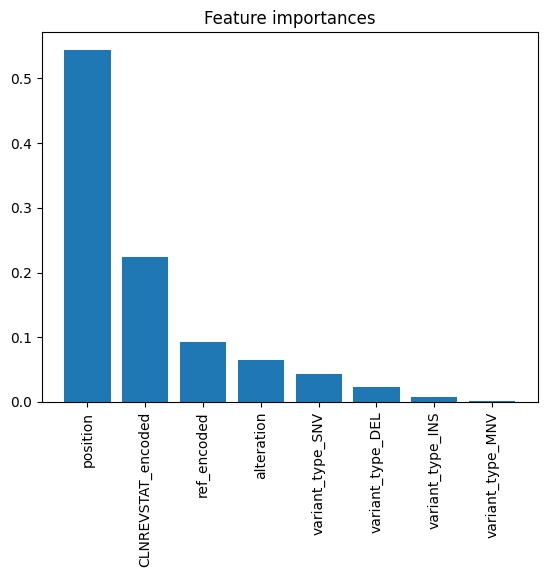

In [209]:
import matplotlib.pyplot as plt

# Check feature importances (if applicable)
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X_train.shape[1]), importances[indices])
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.show()
